In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
def correlate(x1, x2):
    return np.sum(np.multiply(x1, x2)) # this is the same as x1*x1.T but easier to do in numpy
%matplotlib notebook

# 1. Convolution of two signals 
We have just defined the signal space as a space where the inner product is defined as the correlation of two signals. Convolution is the process of flipping one of the signals in time and then taking the correlation between them at every possible time overlap. 

Run the cells below with option 1 for x1 and x2. Does the convolution of these two cells ever equal 0? 

<IPython.core.display.Javascript object>


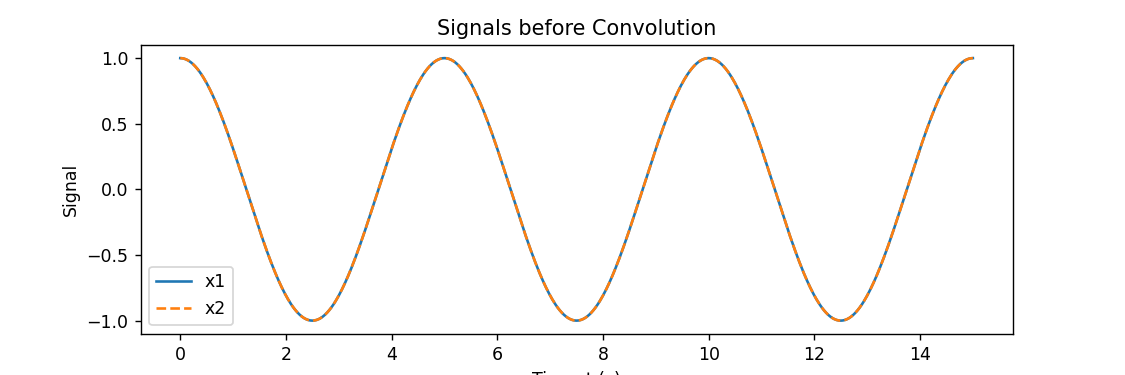

In [6]:
## change your x here

# option 1: rectangle and triangle
x1 = np.append([0], np.append(2*np.ones(398), [0])); x2 = np.append([0], np.flip(np.linspace(0,3,299))); fs = 1000;

# option 2: two cosines
#n_cycles = 3; T_cos = 5; tstart = 0; tstop = n_cycles*T_cos; fs = 50; n_samples = round(n_cycles*T_cos*fs)+1
#t_cont = np.linspace(tstart, tstop, n_samples)
#x1 = np.cos(2*np.pi*(1/T_cos)*t_cont);  x2 = np.cos(2*np.pi*(1/T_cos)*t_cont);

plt.figure(figsize=(9,3))
plt.plot(np.linspace(0, x1.size-1, x1.size)/fs, x1, label="x1", color='C0');
plt.plot(np.linspace(0, x2.size-1, x2.size)/fs,x2, '--', label="x2", color='C1');
plt.ylabel("Signal"); plt.title("Signals before Convolution"); plt.xlabel("Time, t (s)"); plt.legend(); plt.show()

# don't change this, it sets up the time axis for convolution
len_x1 = x1.size; len_x2 = x2.size 
tau_start = np.linspace(-(len_x2-1), 0, len_x2)/fs; tau_stop = np.linspace(1/fs, (len_x1+len_x2), (len_x1+len_x2))/fs
tau = np.append(tau_start, tau_stop); correlations = np.zeros((len_x1+len_x2+len_x2,))

In [7]:
def convolve(x1, x2, time, fs=1000, stop_time=False, fig=False, graph1=False, graph2=False):
    len_x1 = x1.size; len_x2 = x2.size 
    x1zeros = np.zeros((1,len_x1)); x2zeros = np.zeros((1,len_x2));    
    x1_padded = np.append(x2zeros, np.append(x1, x2zeros)); x2_padded = np.append(np.append(np.flip(x2),x2zeros), np.append(x1zeros, x2zeros))
    #tau_start = np.linspace(-(len_x2-1), 0, len_x2)/fs; tau_stop = np.linspace(1/fs, (len_x1+len_x2), (len_x1+len_x2))/fs
    #tau = np.append(tau_start, tau_stop)*fs;
    tau = time;
    correlations = np.zeros((x1_padded.size,))
    #print(tau)
    stop_epoch = np.where(time==stop_time)[0][0]
    for i in range(stop_epoch+1):
        x2_padded = np.roll(x2_padded, 1)
        x2_in_window = x2_padded[len_x2:x2_padded.size]
        correlation=correlate(x1_padded,x2_in_window); correlations[i]=correlation
        if(i == stop_epoch):
            graph1.clear(); graph2.clear();
            # first plot update
            graph1.plot(tau, x1_padded, label="x1", color='C0'); graph1.plot(tau, x2_in_window, label="x2", color='C1')
            fig1.get_axes()[0].set_xlabel(r'Time, $\tau$ (s)'); fig1.get_axes()[0].set_ylabel("Signal"); 
            fig1.get_axes()[0].set_xlim(tau[0], tau[tau.size-1]);  fig1.get_axes()[0].axvline(x = 0, color = 'Black') 
            titlestr = "Convolution at t=" + str(stop_time) + " - Inner Product is " + str(correlation)
            fig1.get_axes()[0].set_title(titlestr); #fig1.get_axes()[0].legend(); #plt.subplot(212); 
            # second plot update
            fig1.get_axes()[1].axvline(x = 0, color = 'Black')
            graph2.plot([tau[0], tau[tau.size-1]], [0,0], '--', color="Black"); fig1.get_axes()[1].set_ylabel("Inner Product");
            graph2.plot(tau[0:i+1], correlations[0:i+1], '-r', label="Inner Product")
            fig1.get_axes()[1].set_xlim(tau[0], tau[tau.size-1]); fig1.get_axes()[1].set_xlabel(r'Time, t (s)'); 
            fig1.get_axes()[1].legend() #plt.title("Convolution")
            #plt.subplots_adjust(left=0.1,bottom=0.2, right=0.9, top=0.9, wspace=0.6, hspace=0.6); plt.show()        
# convolve
#convolve(x1,x2, fs=1000, plot=True, plot_epochs=[0, 10, 390, 699])
#convolve(x1,x2, tau, fs=1000, stop_time=epoch_slider.val, fig=fig1, graph1=graph1, graph2=graph2)

In [8]:
'''
def epoch_slider_update(val):
    print("updating"); print(val)
    graph1.clear(); graph2.clear();
    graph1.plot(np.linspace(1, val, 10))
    graph2.plot([val, 3, val])
    fig1.get_axes()[0].set_ylabel("Y-Axis")
    fig1.get_axes()[0].set_xlabel("X-Axis")
    fig1.subplots_adjust(left=0.1,bottom=0.2, right=0.9, top=0.9, wspace=0.6, hspace=0.6);
    fig1.canvas.draw_idle()
'''
def time_slider_update(val):
    convolve(x1,x2, tau, fs=1000, stop_time=time_slider.val, fig=fig1, graph1=graph1, graph2=graph2)
    fig1.canvas.draw_idle()
def reset(event): time_slider.reset()
def slidermin(event): time_slider.set_val(time_slider.valmin);
def slidermax(event): time_slider.set_val(time_slider.valmax);

<IPython.core.display.Javascript object>


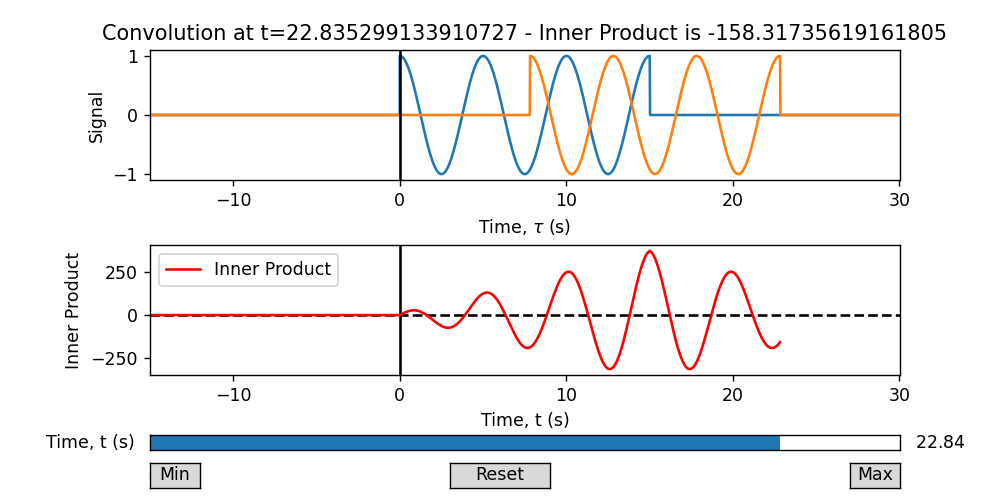

In [9]:
fig1 = plt.figure(figsize=(8,4))
graph1 = fig1.add_subplot(211)
graph2 = fig1.add_subplot(212,sharex=graph1)

plt.subplots_adjust(left=0.1,bottom=0.2, right=0.9, top=0.9, wspace=0.6, hspace=.4); plt.show()
# adjust the main plot to make room for the sliders
fig1.subplots_adjust(left=.15, right=0.9, bottom=0.25, hspace=0.5)
axtime = fig1.add_axes([0.15, 0.1, 0.75, 0.03])
time_slider = Slider(
    ax=axtime,
    label='Time, t (s)',
    valmin=np.min(tau),
    valmax=np.max(tau),
    valstep=tau,
    valinit=0,
)
time_slider.vline._linewidth = 0
ax_min = fig1.add_axes([0.15, 0.025, 0.05, 0.05]); 
button1 = Button(ax_min, 'Min', hovercolor='#4ccf59'); 
button1.on_clicked(slidermin)

ax_reset = fig1.add_axes([0.45, 0.025, 0.1, 0.05]); 
button2 = Button(ax_reset, 'Reset', hovercolor='#4ccf59'); 
button2.on_clicked(reset)

ax_max = fig1.add_axes([0.85, 0.025, 0.05, 0.05]); 
button3 = Button(ax_max, 'Max', hovercolor='#4ccf59'); 
button3.on_clicked(slidermax)

time_slider.on_changed(time_slider_update)
convolve(x1,x2, tau, fs=1000, stop_time=0, fig=fig1, graph1=graph1, graph2=graph2)

# Convolution of two Cosines
Re-run the above cells and reflect on these questions: 
1. When is the correlation (inner product) between the two signals 0?
2. What is significant about the points where the correlation is zero? what is the name for the time-shifted signal at the points where the correlation is zero?
3. Given that the inner product of two non-zero verctors is only zero if they are orthogonal, could these signals be basis vectos for the signal space?
4. How does this realization relate to the Fourier series?